<a href="https://colab.research.google.com/github/VMBoehm/DeNoPa/blob/master/Cifar10ClassificationWithPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook does PCA on cifar 10**




In [1]:
from google.colab import drive

ROOT = "/content/gdrive"

drive.mount(ROOT, force_remount=True)

Mounted at /content/gdrive


In [2]:
%pylab inline
import pickle
import numpy as np
import tensorflow

Populating the interactive namespace from numpy and matplotlib


In [0]:
import tensorflow as tf


In [0]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

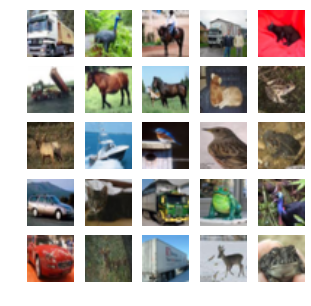

In [5]:

fig, axes = plt.subplots(5,5,figsize=(5,5))
k =0
for j in range(5):
  for i in range(5):
    k+=1
    axes[i][j].imshow(x_train[k], interpolation='bilinear')
    axes[i][j].axis('off')

In [6]:
DATA_SHAPE = 32*32*3
X_TRAIN = x_train.reshape(-1,DATA_SHAPE)
X_TEST  = x_test.reshape(-1,DATA_SHAPE)
print(X_TEST.shape)

(10000, 3072)


In [7]:
DATA_SHAPE**2


9437184

In [0]:
pca_path = './gdrive/My Drive/PCA/cifar10/'

In [0]:
from sklearn.decomposition import PCA


# for ii in range(10):
#   indices = np.where(y_train==ii)[0]
#   print(ii)
#   x_train_class = X_TRAIN[indices]


#   mean      = np.mean(x_train_class, axis=0)

  
#   mean_image = mean.reshape((32,32,3))
  
  
  
#   plt.figure()
#   plt.imshow((mean_image-min(mean))/(max(mean)-min(mean)),interpolation='nearest')
#   plt.show()
  
#   num       = x_train_class.shape[1]
#   pca = PCA(svd_solver='full',n_components=num)
#   pca.fit(x_train_class)  

#   pickle.dump([pca,mean], open(pca_path+'pca_on_%d_num_comp_full.pkl'%ii,'wb'))



In [21]:
32*32

1024

In [0]:
import numpy.linalg as lg
def get_probability_of_data(logdet,Cinv,data, mean):
  d    = len(data)
  data = data-mean
  Cinv_d = np.einsum('jk,...k->...j',Cinv,data, optimize=True)
  
  logprob = -0.5*logdet-0.5*d*np.log((2*np.pi))-0.5*np.einsum('ij,ij->i',data, Cinv_d, optimize=True)
  return logprob

In [33]:
# do classification
import time
nums = [3*1024]
acc = np.zeros((len(nums),10))


for ll in range(len(nums)):
  num = nums[ll] 
  logprob=np.zeros((10,10,1000))
  print(ll)
  for jj in range(10):
    print(jj)
    pca, mean = pickle.load(open(pca_path+'pca_on_%d_num_comp_full.pkl'%(jj),'rb')) 
      
    sing     = pca.explained_variance_[0:num]
    R        = pca.components_[0:num]

    if num<3*1024:
      sigma2   = np.mean(pca.explained_variance_[num::])
    else:
      sigma2 = 0.
    
      
    C_       = np.dot(R.T,np.dot(np.diag(sing), R))+np.eye(DATA_SHAPE)*sigma2
    Cinv     = lg.inv(C_)
    sign ,logdetC = lg.slogdet(C_)
    
   
    for ii in range(10):
      print(ii)
      indices       = np.where(y_test==ii)[0]
      data          = X_TEST[indices]
      logprob_      = get_probability_of_data(logdetC,Cinv,data,mean)
      logprob[jj,ii]= logprob_
      

  for ii in range(10):
    correct = len(np.where(np.argsort(logprob[:,ii,:], axis=0)[-1]==ii)[0])
    print(correct)
    acc_    = np.float(correct)/1000.
    print('acc:', acc_)
    acc[ll,ii]=acc_
    
pickle.dump(acc, open(pca_path+'accuracies_addedvariance_testset.pkl','wb'))

0
0
0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6
7
8
9
2
0
1
2
3
4
5
6
7
8
9
3
0
1
2
3
4
5
6
7
8
9
4
0
1
2
3
4
5
6
7
8
9
5
0
1
2
3
4
5
6
7
8
9
6
0
1
2
3
4
5
6
7
8
9
7
0
1
2
3
4
5
6
7
8
9
8
0
1
2
3
4
5
6
7
8
9
9
0
1
2
3
4
5
6
7
8
9
155
acc: 0.155
713
acc: 0.713
139
acc: 0.139
135
acc: 0.135
171
acc: 0.171
168
acc: 0.168
785
acc: 0.785
551
acc: 0.551
223
acc: 0.223
583
acc: 0.583


In [0]:
acctest = pickle.load(open(pca_path+'accuracies_addedvariance_testset.pkl','rb'))


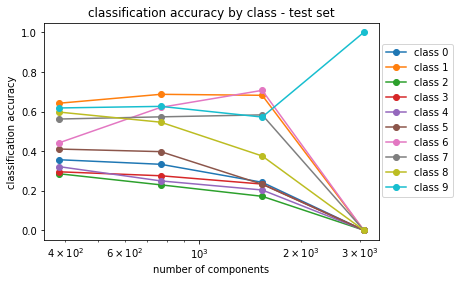

In [31]:
plt.title('classification accuracy by class - test set')
for ii in range(10):
  plt.semilogx(nums, acctest[:,ii], marker='o',label='class %d'%ii)
  plt.xlabel('number of components')
  plt.ylabel('classification accuracy')
  plt.legend(loc=(1.01,0.2))

In [32]:
# do classification
import time
nums = [3*128,3*256,3*512,3*1024]
acc = np.zeros((len(nums),10))


for ll in range(len(nums)):
  num = nums[ll] 
  logprob=np.zeros((10,10,5000))
  print(ll)
  for jj in range(10):
    print(jj)
    pca, mean = pickle.load(open(pca_path+'pca_on_%d_num_comp_full.pkl'%(jj),'rb')) 
      
    sing     = pca.singular_values_[0:num]
    R        = pca.components_[0:num]

    sigma2   = np.mean(pca.explained_variance_[num::])
      
    C_       = np.dot(R.T,np.dot(np.diag(sing), R))+np.eye(DATA_SHAPE)*sigma2
    Cinv     = lg.inv(C_)
    sign ,logdetC = lg.slogdet(C_)
    
   
    for ii in range(10):
      print(ii)
      indices       = np.where(y_train==ii)[0]
      data          = X_TRAIN[indices]
      logprob_      = get_probability_of_data(logdetC,Cinv,data,mean)
      logprob[jj,ii]= logprob_
      

  for ii in range(10):
    correct = len(np.where(np.argsort(logprob[:,ii,:], axis=0)[-1]==ii)[0])
    print(correct)
    acc_    = np.float(correct)/5000.
    print('acc:', acc_)
    acc[ll,ii]=acc_
    
pickle.dump(acc, open(pca_path+'accuracies_addedvariance_trainset.pkl','wb'))

0
0
0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6


KeyboardInterrupt: ignored

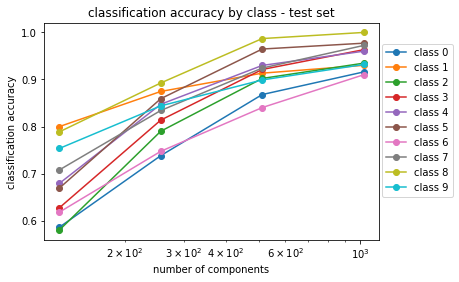

In [43]:
acctrain = pickle.load(open(pca_path+'accuracies_addedvariance_trainset.pkl','rb'))
plt.title('classification accuracy by class - test set')
for ii in range(10):
  plt.semilogx(nums, acctrain[:,ii], marker='o',label='class %d'%ii)
  plt.xlabel('number of components')
  plt.ylabel('classification accuracy')
  plt.legend(loc=(1.01,0.2))

In [10]:
from sklearn.covariance import LedoitWolf, EmpiricalCovariance

for ii in range(10):
  indices = np.where(y_train==ii)[0]
  print(ii)
  x_train_class = X_TRAIN[indices]
  cov = LedoitWolf().fit(x_train_class).covariance_
  cov2= EmpiricalCovariance().fit(x_train_class).covariance_
  print(cov)
  print(cov2)
  svd = np.linalg.svd(cov)
#   num       = x_train_class.shape[1]
#   pca = PCA(svd_solver='full',n_components=num)
#   pca.fit(x_train_class)  
  pickle.dump(svd, open(pca_path+'LedoitWolf_SVD_on_%d_num_comp_full.pkl'%ii,'wb'))

0
[[4711.01130973 3870.85487436 2995.08718069 ... 1868.97687526
  1503.91095174 1048.45942996]
 [3870.85487436 3796.98625973 3382.62083656 ... 1674.79889975
  1659.14697818 1392.35235198]
 [2995.08718069 3382.62083656 3902.13350442 ... 1461.91856072
  1657.60500801 1881.51942313]
 ...
 [1868.97687526 1674.79889975 1461.91856072 ... 4481.15075011
  4035.20361215 3736.94861884]
 [1503.91095174 1659.14697818 1657.60500801 ... 4035.20361215
  4173.07912318 4191.12934364]
 [1048.45942996 1392.35235198 1881.51942313 ... 3736.94861884
  4191.12934364 5129.41203674]]
[[4712.25679424 3877.19343216 2999.99166144 ... 1872.0373408
  1506.37361872 1050.1762912 ]
 [3877.19343216 3796.73502044 3388.15990696 ... 1677.5413972
  1661.86384548 1394.6323408 ]
 [2999.99166144 3388.15990696 3902.05444464 ... 1464.3124648
  1660.31935032 1884.6004272 ]
 ...
 [1872.0373408  1677.5413972  1464.3124648  ... 4482.019836
  4041.8112924  3743.067904  ]
 [1506.37361872 1661.86384548 1660.31935032 ... 4041.8112924
 

KeyboardInterrupt: ignored

In [25]:
for ii in range(1):
  indices = np.where(y_train==ii)[0]
  print(ii)
  x_train_class = X_TRAIN[indices]
  svd = pickle.load(open(pca_path+'LedoitWolf_SVD_on_%d_num_comp_full.pkl'%ii,'rb'))
  cov = EmpiricalCovariance().fit(x_train_class).covariance_
  eig = np.linalg.eigvals(cov)
  svd = np.linalg.svd(cov)
  svd = np.linalg.svd(cov)
  mean = np.mean(x_train_class, axis=0)
  svd1 = np.linalg.svd((x_train_class-mean).T)
  svd2 = np.linalg.svd((x_train_class-mean))
  pca = PCA(svd_solver='full',n_components=1024*3)
  pca_= pca.fit(x_train_class)
  print(eig)
  print(svd[1])
  print(pca.singular_values_)
  print(pca.explained_variance_)
  print(svd1[1])
  print(svd2[1])


0
[4.23599991e+06 1.51816957e+06 7.36732741e+05 ... 6.59083888e-02
 6.56086921e-02 6.55158801e-02]
[4.23599991e+06 1.51816957e+06 7.36732741e+05 ... 1.69601282e-02
 1.64317936e-02 1.63043485e-02]
[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]
[4.23684728e+06 1.51847326e+06 7.36880117e+05 ... 1.69635209e-02
 1.64350806e-02 1.63076100e-02]
[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]
[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]


In [26]:
R        = pca.components_
cov_     = np.dot(R.T,np.dot(np.diag(pca.explained_variance_), R))
print(cov_)
print(cov)

[[4713.19943413 3877.96902597 3000.5917798  ... 1872.41182316
  1506.67495371 1050.38636847]
 [3877.96902597 3797.49451934 3388.83767449 ... 1677.87697259
  1662.19628474 1394.91132306]
 [3000.5917798  3388.83767449 3902.83501164 ... 1464.60538588
  1660.65148062 1884.97742268]
 ...
 [1872.41182316 1677.87697259 1464.60538588 ... 4482.91641928
  4042.61981636 3743.81666733]
 [1506.67495371 1662.19628474 1660.65148062 ... 4042.61981636
  4174.27859488 4198.83212002]
 [1050.38636847 1394.91132306 1884.97742268 ... 3743.81666733
  4198.83212002 5132.36912983]]
[[4712.25679424 3877.19343216 2999.99166144 ... 1872.0373408
  1506.37361872 1050.1762912 ]
 [3877.19343216 3796.73502044 3388.15990696 ... 1677.5413972
  1661.86384548 1394.6323408 ]
 [2999.99166144 3388.15990696 3902.05444464 ... 1464.3124648
  1660.31935032 1884.6004272 ]
 ...
 [1872.0373408  1677.5413972  1464.3124648  ... 4482.019836
  4041.8112924  3743.067904  ]
 [1506.37361872 1661.86384548 1660.31935032 ... 4041.8112924
  4

[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]
